# Region visualizations


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoLocator, AutoMinorLocator, MultipleLocator,FixedLocator, LogLocator

import os
os.sys.path += ['../deta_cats/','../non-resonant-studies','../code/']
from statUtils import plotCorrelation
from pull_imp_utils import *
from eventDisplays import rainbow_text

import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

Using uproot4


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


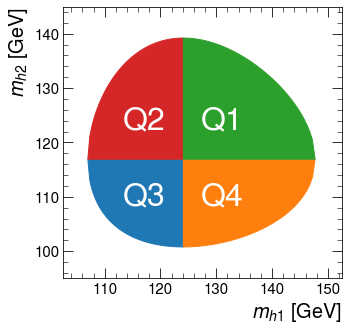

In [5]:
x,y = 124,117

plt.figure(figsize=(5,5))

'''
Q2 / Q3 (upper / lower left)
'''
SR_x1 = np.linspace(x / 1.16, x)
alpha = np.power(10*(SR_x1 - x)/SR_x1,2)
SR_y1 = y / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = y / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

plt.fill_between(SR_x1,SR_y1,y,color='C0')
plt.fill_between(SR_x1,y,SR_y2,color='C3')

'''
Q4 (lower/ upper right)
'''
SR_x2 = np.linspace(x, x/ 0.840000000001)
alpha = np.power(10*(SR_x2 - x)/SR_x2,2)
SR_y1 = y / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = y / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

plt.fill_between(SR_x2,SR_y1,y,color='C1')
plt.fill_between(SR_x2,y,SR_y2,color='C2')

s=7
fs=32
plt.text(x-s,y-s,'Q3',color='w',fontsize=fs,ha='center',va='center')
plt.text(x+s,y-s,'Q4',color='w',fontsize=fs,ha='center',va='center')
plt.text(x+s,y+s,'Q1',color='w',fontsize=fs,ha='center',va='center')
plt.text(x-s,y+s,'Q2',color='w',fontsize=fs,ha='center',va='center')

plt.xlabel('$m_{h1}$ [GeV]',fontsize=20,x=1,ha='right')
plt.ylabel('$m_{h2}$ [GeV]',fontsize=20,y=1,ha='right')

plt.xlim(102.5,152.5)
plt.ylim(95,145)

plt.savefig(f'figures/ggF_PUSH/NP_split/quadNPs_nomSR.pdf',bbox_inches='tight')
plt.show()

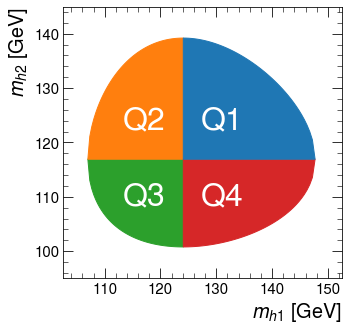

In [3]:
x,y = 124,117

plt.figure(figsize=(5,5))

'''
Q2 / Q3 (upper / lower left)
'''
SR_x1 = np.linspace(x / 1.16, x)
alpha = np.power(10*(SR_x1 - x)/SR_x1,2)
SR_y1 = y / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = y / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

plt.fill_between(SR_x1,SR_y1,y,color='C2')
plt.fill_between(SR_x1,y,SR_y2,color='C1')

'''
Q4 (lower/ upper right)
'''
SR_x2 = np.linspace(x, x/ 0.840000000001)
alpha = np.power(10*(SR_x2 - x)/SR_x2,2)
SR_y1 = y / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = y / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

plt.fill_between(SR_x2,SR_y1,y,color='C3')
plt.fill_between(SR_x2,y,SR_y2,color='C0')

s=7
fs=32
plt.text(x-s,y-s,'Q3',color='w',fontsize=fs,ha='center',va='center')
plt.text(x+s,y-s,'Q4',color='w',fontsize=fs,ha='center',va='center')
plt.text(x+s,y+s,'Q1',color='w',fontsize=fs,ha='center',va='center')
plt.text(x-s,y+s,'Q2',color='w',fontsize=fs,ha='center',va='center')

plt.xlabel('$m_{h1}$ [GeV]',fontsize=20,x=1,ha='right')
plt.ylabel('$m_{h2}$ [GeV]',fontsize=20,y=1,ha='right')

plt.xlim(102.5,152.5)
plt.ylim(95,145)

plt.savefig(f'figures/ggF_PUSH/NP_split/quadNPs_nomSR_CG_colors.pdf',bbox_inches='tight')
plt.show()

In [28]:
eps = 1.05

r = 45


CR_x2 = np.linspace(x, x*eps+r)

CR_x = np.concatenate([CR_x1[:-1],CR_x2])  #np.linspace(x*eps-r, x*eps+r)


CR_y1 = y*eps + gamma



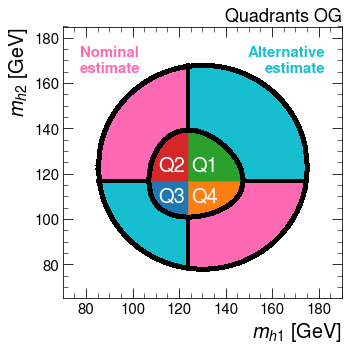

In [105]:
plt.figure(figsize=(5,5))


# Lets draw the circles first + then put the others on top!
CR_x = np.linspace(x*eps-r, x*eps+r,100)
gamma = np.sqrt(r**2 - np.power(CR_x-x*eps, 2))


CR_y1 = y*eps - gamma
CR_y2 = y*eps + gamma
plt.fill_between(CR_x, CR_y1, CR_y2, color='hotpink')

# Add solid lines defining the contour boundaries
lw=4
plt.plot(np.concatenate([CR_x,CR_x[::-1]]), 
         np.concatenate([CR_y1, CR_y2]), color='k', lw=lw)


# Lower left moon
CR_x1 = np.linspace(x*eps-r, x)
gamma = np.sqrt(r**2 - np.power(CR_x1-x*eps, 2))
CR_y1 = y*eps - gamma
plt.fill_between(CR_x1[CR_y1 < y], CR_y1[CR_y1 < y], y, color='C9')

# Upper right moon
CR_x2 = np.linspace(x, x*eps+r)
gamma = np.sqrt(r**2 - np.power(CR_x2-x*eps, 2))
CR_y2 = y*eps + gamma

plt.fill_between(CR_x2, y, CR_y2, color='C9')


'''
Viz the boundaries
'''
x_min = x / (1 + 0.1 * np.sqrt(np.power(1.6,2)))
x_max = x / (1 - 0.1 * np.sqrt(np.power(1.6,2)))

plt.plot([CR_x1[0],x_min],[y]*2,'k',lw=lw)
plt.plot([x_max,CR_x2[-1]],[y]*2,'k',lw=lw)

y_min = y / (1 + 0.1 * np.sqrt(np.power(1.6,2)))
y_max = y / (1 - 0.1 * np.sqrt(np.power(1.6,2)))

plt.plot([x]*2,[min(CR_y1),y_min],'k',lw=lw)
plt.plot([x]*2,[y_max,max(CR_y2)],'k',lw=lw)


'''
Q2 / Q3 (upper / lower left)
'''
SR_x1 = np.linspace(x / 1.16, x)
alpha = np.power(10*(SR_x1 - x)/SR_x1,2)
SR_y1 = y / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = y / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

plt.fill_between(SR_x1,SR_y1,y,color='C0')
plt.fill_between(SR_x1,y,SR_y2,color='C3')

'''
Q4 (lower/ upper right)
'''
SR_x2 = np.linspace(x, x/ 0.840000000001)
alpha = np.power(10*(SR_x2 - x)/SR_x2,2)
SR_y1 = y / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = y / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

plt.fill_between(SR_x2,SR_y1,y,color='C1')
plt.fill_between(SR_x2,y,SR_y2,color='C2')


# Outline for the CR (?)
SR_x = np.linspace(x / 1.16, x/ 0.840000000001)
alpha = np.power(10*(SR_x - x)/SR_x,2)
SR_y1 = y / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = y / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))


plt.plot(np.concatenate([SR_x,SR_x[::-1]]), 
         np.concatenate([SR_y1, SR_y2[::-1]]), color='k', lw=lw)


s=7
fs=20
plt.text(x-s,y-s,'Q3',color='w',fontsize=fs,ha='center',va='center')
plt.text(x+s,y-s,'Q4',color='w',fontsize=fs,ha='center',va='center')
plt.text(x+s,y+s,'Q1',color='w',fontsize=fs,ha='center',va='center')
plt.text(x-s,y+s,'Q2',color='w',fontsize=fs,ha='center',va='center')

plt.xlabel('$m_{h1}$ [GeV]',fontsize=20,x=1,ha='right')
plt.ylabel('$m_{h2}$ [GeV]',fontsize=20,y=1,ha='right')

plt.title('Quadrants OG',loc='right')

ax = plt.gca()
plt.text(0.06,0.93,'Nominal\nestimate',ha='left',va='top',transform=ax.transAxes,
         color='hotpink',fontweight='bold')
plt.text(0.94,0.93,'Alternative\nestimate',ha='right',va='top',transform=ax.transAxes,
         color='C9',fontweight='bold')

plt.xlim(70,190)
plt.ylim(65,185)

plt.savefig(f'figures/ggF_PUSH/NP_split/quadNPs_Xhh_quad_OG.png',bbox_inches='tight')
plt.show()

In [107]:
CR_x

array([ 85.2       ,  86.10909091,  87.01818182,  87.92727273,
        88.83636364,  89.74545455,  90.65454545,  91.56363636,
        92.47272727,  93.38181818,  94.29090909,  95.2       ,
        96.10909091,  97.01818182,  97.92727273,  98.83636364,
        99.74545455, 100.65454545, 101.56363636, 102.47272727,
       103.38181818, 104.29090909, 105.2       , 106.10909091,
       107.01818182, 107.92727273, 108.83636364, 109.74545455,
       110.65454545, 111.56363636, 112.47272727, 113.38181818,
       114.29090909, 115.2       , 116.10909091, 117.01818182,
       117.92727273, 118.83636364, 119.74545455, 120.65454545,
       121.56363636, 122.47272727, 123.38181818, 124.29090909,
       125.2       , 126.10909091, 127.01818182, 127.92727273,
       128.83636364, 129.74545455, 130.65454545, 131.56363636,
       132.47272727, 133.38181818, 134.29090909, 135.2       ,
       136.10909091, 137.01818182, 137.92727273, 138.83636364,
       139.74545455, 140.65454545, 141.56363636, 142.47

In [109]:
plt.plot(CR_x,CR_x-x+ y)
plt.scatter([x],[y],marker='x',color='r')

In [119]:
len(CR_x)

100

In [120]:
len(CR_y2)

100

In [121]:
len(y_low)

76

In [125]:
y_sel = np.concatenate([CR_y2[CR_x < x],CR_y2[CR_x > x]])

In [126]:
len(y_sel)

100

In [130]:
y_low<CR_y2

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

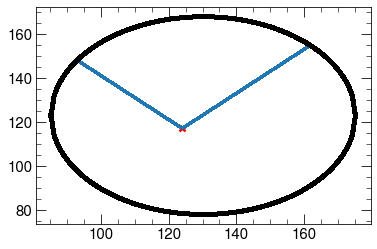

In [131]:
y_low = np.concatenate([-(CR_x[CR_x < x]-x)+ y, CR_x[CR_x > x]-x+ y])



#y_low = y_low[y_low<CR_y2[(CR_x < x)]]

plt.plot(CR_x[y_low<CR_y2],y_low[y_low<CR_y2])
plt.scatter([x],[y],marker='x',color='r')


plt.plot(np.concatenate([CR_x,CR_x[::-1]]), 
         np.concatenate([CR_y1, CR_y2]), color='k', lw=lw)

In [135]:
len(y_low)

100

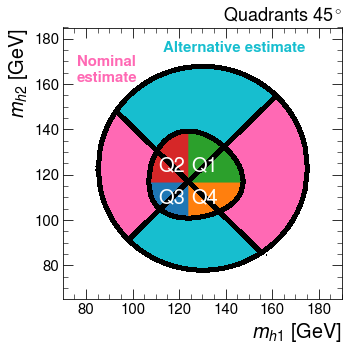

In [144]:
plt.figure(figsize=(5,5))


# Lets draw the circles first + then put the others on top!
CR_x = np.linspace(x*eps-r, x*eps+r,100)
gamma = np.sqrt(r**2 - np.power(CR_x-x*eps, 2))


CR_y1 = y*eps - gamma
CR_y2 = y*eps + gamma
plt.fill_between(CR_x, CR_y1, CR_y2, color='hotpink')

# Add solid lines defining the contour boundaries
lw=4
plt.plot(np.concatenate([CR_x,CR_x[::-1]]), 
         np.concatenate([CR_y1, CR_y2]), color='k', lw=lw)


# Top moon
y_low = np.concatenate([-(CR_x[CR_x < x]-x)+ y, CR_x[CR_x > x]-x+ y])
plt.fill_between(CR_x[y_low<CR_y2], y_low[y_low<CR_y2],CR_y2[y_low<CR_y2], color='C9')

# Bottom moon
y_up = np.concatenate([(CR_x[CR_x < x]-x)+ y, -(CR_x[CR_x > x]-x)+ y])
plt.fill_between(CR_x[y_up>CR_y1], CR_y1[y_up>CR_y1], y_up[y_up>CR_y1], color='C9')


'''
Viz the boundaries
'''
plt.plot(CR_x[y_low<CR_y2],y_low[y_low<CR_y2],'k',lw=lw)
plt.plot(CR_x[y_up>CR_y1], y_up[y_up>CR_y1],'k',lw=lw)

'''
Q2 / Q3 (upper / lower left)
'''
SR_x1 = np.linspace(x / 1.16, x)
alpha = np.power(10*(SR_x1 - x)/SR_x1,2)
SR_y1 = y / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = y / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

plt.fill_between(SR_x1,SR_y1,y,color='C0')
plt.fill_between(SR_x1,y,SR_y2,color='C3')

'''
Q4 (lower/ upper right)
'''
SR_x2 = np.linspace(x, x/ 0.840000000001)
alpha = np.power(10*(SR_x2 - x)/SR_x2,2)
SR_y1 = y / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = y / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

plt.fill_between(SR_x2,SR_y1,y,color='C1')
plt.fill_between(SR_x2,y,SR_y2,color='C2')


# Outline for the CR (?)
SR_x = np.linspace(x / 1.16, x/ 0.840000000001)
alpha = np.power(10*(SR_x - x)/SR_x,2)
SR_y1 = y / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = y / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))


plt.plot(np.concatenate([SR_x,SR_x[::-1]]), 
         np.concatenate([SR_y1, SR_y2[::-1]]), color='k', lw=lw)


s=7
fs=20
plt.text(x-s,y-s,'Q3',color='w',fontsize=fs,ha='center',va='center')
plt.text(x+s,y-s,'Q4',color='w',fontsize=fs,ha='center',va='center')
plt.text(x+s,y+s,'Q1',color='w',fontsize=fs,ha='center',va='center')
plt.text(x-s,y+s,'Q2',color='w',fontsize=fs,ha='center',va='center')

plt.xlabel('$m_{h1}$ [GeV]',fontsize=20,x=1,ha='right')
plt.ylabel('$m_{h2}$ [GeV]',fontsize=20,y=1,ha='right')

plt.title('Quadrants 45$^\circ$',loc='right')

ax = plt.gca()
plt.text(0.05,0.9,'Nominal\nestimate',ha='left',va='top',transform=ax.transAxes,
         color='hotpink',fontweight='bold')
plt.text(0.36,0.95,'Alternative estimate',ha='left',va='top',transform=ax.transAxes,
         color='C9',fontweight='bold')

plt.xlim(70,190)
plt.ylim(65,185)

#plt.savefig(f'figures/ggF_PUSH/NP_split/quadNPs_Xhh_quad_45.png',bbox_inches='tight')
plt.show()

Ok - so needs some work - but I can (and will) refine this tomorrow - and this is going to make for *super* nice vizualization plots!!!